In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()

## Training dataset preparation

In [4]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/italy_paths.yaml'

## Model training: base model

### Fine tune: batch size

In [6]:
# Set batch size 

batch_s = [16,32,64]

for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5s6.pt \
    --cache \
    --freeze 12 \
    --project Italy \
    --name {model_name}

**************TRAINING MODEL b16_e200_f12*********
train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/italy_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Italy, name=b16_e200_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 28 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/labels/train.cache
libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.0GB ram):   6%|▌         | 11/181 [00:00<00:02, 81.46itlibpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram):  50%|████▉     | 90/181 [00:00<00:00, 424.20ilibpng warning: iCCP: extra compressed data
train: Caching images (0.1GB ram): 100%|██████████| 181/181 [00:00<00:00, 385.30
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/italy/labels/val.cache
val: Caching images (

     20/199       1.5G    0.04099    0.02154   0.006165         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.575      0.781      0.643      0.332

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     21/199       1.5G    0.04131    0.01897    0.00587         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.589      0.759      0.644      0.341

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199       1.5G    0.03946    0.01955   0.005315         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.491      0.798      0.595      0.308

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/19

     45/199       1.5G     0.0302    0.01645     0.0025         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.875       0.87      0.895      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     46/199       1.5G    0.02982    0.01501   0.002128         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.897      0.885      0.893      0.621

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199       1.5G     0.0293    0.01452    0.00273         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.855      0.858      0.908       0.62

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/19

     70/199       1.5G     0.0236    0.01353     0.0019         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.859      0.894      0.881      0.662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     71/199       1.5G    0.02361    0.01272   0.001855         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.886      0.845      0.878      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199       1.5G     0.0239    0.01566   0.002074         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.872      0.884      0.882      0.646

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/19

     95/199       1.5G    0.02194    0.01286   0.002088         21        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.889      0.885      0.893      0.634

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     96/199       1.5G    0.02123    0.01212   0.001441         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.865      0.899      0.898      0.678

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199       1.5G    0.02027    0.01197   0.002183         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.904      0.833      0.888      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/19

    120/199       1.5G    0.01936    0.01116   0.001506          7        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.892      0.865      0.894      0.676

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    121/199       1.5G    0.01801    0.01162   0.000827         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888       0.86      0.887      0.673

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199       1.5G     0.0171    0.01113   0.001079         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.892       0.86      0.883      0.661

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/19

    145/199       1.5G    0.01592     0.0119  0.0009179         31        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.902      0.851      0.886      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    146/199       1.5G    0.01617     0.0111  0.0008367         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.911      0.854      0.884      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199       1.5G    0.01565    0.01108  0.0008528         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.914      0.859      0.878      0.665

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/19

    170/199       1.5G    0.01342    0.01048    0.00118         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.888      0.851      0.887       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    171/199       1.5G    0.01326   0.009796  0.0006977         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.913      0.868      0.886       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199       1.5G     0.0135    0.01009  0.0005286         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.923      0.868      0.886      0.698

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/19

    195/199       1.5G     0.0128    0.01052  0.0005233         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927       0.84      0.887      0.707

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    196/199       1.5G    0.01237    0.01001  0.0003063         31        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.831      0.888       0.71

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199       1.5G    0.01201   0.009358   0.000432         14        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.829       0.89      0.716

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/19

freezing model.4.m.0.cv2.conv.weight
freezing model.4.m.0.cv2.bn.weight
freezing model.4.m.0.cv2.bn.bias
freezing model.4.m.1.cv1.conv.weight
freezing model.4.m.1.cv1.bn.weight
freezing model.4.m.1.cv1.bn.bias
freezing model.4.m.1.cv2.conv.weight
freezing model.4.m.1.cv2.bn.weight
freezing model.4.m.1.cv2.bn.bias
freezing model.5.conv.weight
freezing model.5.bn.weight
freezing model.5.bn.bias
freezing model.6.cv1.conv.weight
freezing model.6.cv1.bn.weight
freezing model.6.cv1.bn.bias
freezing model.6.cv2.conv.weight
freezing model.6.cv2.bn.weight
freezing model.6.cv2.bn.bias
freezing model.6.cv3.conv.weight
freezing model.6.cv3.bn.weight
freezing model.6.cv3.bn.bias
freezing model.6.m.0.cv1.conv.weight
freezing model.6.m.0.cv1.bn.weight
freezing model.6.m.0.cv1.bn.bias
freezing model.6.m.0.cv2.conv.weight
freezing model.6.m.0.cv2.bn.weight
freezing model.6.m.0.cv2.bn.bias
freezing model.6.m.1.cv1.conv.weight
freezing model.6.m.1.cv1.bn.weight
freezing model.6.m.1.cv1.bn.bias
freezing m

                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.243      0.526      0.321      0.179

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     13/199      2.86G    0.05823    0.02723    0.01406        175        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.407      0.509      0.425      0.194

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     14/199      2.86G    0.05599    0.02404    0.01217        119        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.332      0.623       0.49      0.178

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     15/199      2.86G    0.05478    0.02403    0.01013         76        640: 1
          

     37/199      2.86G    0.03459    0.01655   0.002933        114        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.669      0.897      0.747      0.399

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     38/199      2.86G     0.0333     0.0176   0.003475        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.738      0.868       0.79      0.489

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     39/199      2.86G    0.03372    0.01669   0.002901         94        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.736      0.807      0.771       0.45

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     40/19

     62/199      2.86G    0.02638    0.01418   0.001693        113        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.866       0.93      0.916      0.652

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     63/199      2.86G    0.02604    0.01356   0.001931         69        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.854       0.93      0.912      0.614

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     64/199      2.86G    0.02537    0.01448    0.00202         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.878      0.947       0.92      0.635

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     65/19

     87/199      2.86G    0.02185    0.01271   0.001355         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.909      0.882      0.921      0.659

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     88/199      2.86G    0.02214    0.01283   0.001664         78        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.897      0.895      0.921      0.668

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     89/199      2.86G    0.02227    0.01367   0.001539        108        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76        0.9      0.912      0.911      0.688

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     90/19

    112/199      2.86G    0.01929     0.0115   0.001359         72        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.892      0.886      0.902      0.671

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    113/199      2.86G    0.01811    0.01208   0.001478         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.904      0.877      0.899      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    114/199      2.86G    0.01803    0.01081   0.001041         73        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.927      0.877      0.899      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    115/19

    137/199      2.86G    0.01636    0.01108    0.00108         67        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.894      0.854      0.881      0.657

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    138/199      2.86G    0.01599     0.0106  0.0008744         75        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.89      0.865      0.878      0.681

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    139/199      2.86G    0.01638    0.01056  0.0008641         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.868      0.877      0.883      0.662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    140/19

    162/199      2.86G    0.01429    0.01045  0.0005847         74        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.921      0.842       0.88      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    163/199      2.86G    0.01363   0.009737  0.0004075         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.912      0.835      0.887      0.699

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    164/199      2.86G    0.01361   0.009489  0.0008525         85        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.914      0.825       0.89      0.703

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    165/19

    187/199      2.86G    0.01287    0.01037  0.0002967         90        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.88      0.892      0.901      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    188/199      2.86G    0.01285   0.009692  0.0005513         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.878      0.894      0.907      0.718

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    189/199      2.86G    0.01339    0.00962  0.0004033        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.875      0.893      0.902      0.719

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    190/19

 27                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 28          [-1, 16]  1         0  models.common.Concat                    [1]                           
 29                -1  1    715008  models.common.C3                        [512, 384, 1, False]          
 30                -1  1   1327872  models.common.Conv                      [384, 384, 3, 2]              
 31          [-1, 12]  1         0  models.common.Concat                    [1]                           
 32                -1  1   1313792  models.common.C3                        [768, 512, 1, False]          
 33  [23, 26, 29, 32]  1     26964  models.yolo.Detect                      [2, [[19, 27, 44, 40, 38, 94], [96, 68, 86, 152, 180, 137], [140, 301, 303, 264, 238, 542], [436, 615, 739, 380, 925, 792]], [128, 256, 384, 512]]
Model summary: 281 layers, 12326164 parameters, 12326164 gradients, 16.3 GFLOPs

Transferred 451/459 items from yolov5s6.pt
AMP: checks

      6/199      3.37G    0.08365    0.03201    0.02256        206        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76     0.0214      0.281     0.0258    0.00916

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      7/199      3.37G    0.07437    0.03013    0.02225        184        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76     0.0915      0.281     0.0629     0.0202

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      8/199      3.37G     0.0709    0.03159    0.02159        236        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.608      0.167      0.191     0.0695

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/19

     31/199      3.37G    0.04643    0.02163    0.00617        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.343      0.702      0.475      0.253

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     32/199      3.37G    0.04707    0.01889   0.006036        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.531      0.614      0.609      0.304

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     33/199      3.37G    0.04644    0.01975   0.006071        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.517      0.684      0.603      0.294

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/19

     56/199      3.37G    0.03008    0.01461   0.002498        191        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.711      0.784      0.827      0.524

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     57/199      3.37G      0.031    0.01595   0.002635        291        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.725      0.807       0.81      0.507

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     58/199      3.37G    0.02973    0.01443   0.002574        195        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.798      0.882      0.865      0.561

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/19

     81/199      3.37G    0.02471    0.01302   0.001933        226        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.881       0.93      0.922      0.642

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     82/199      3.37G    0.02448    0.01293    0.00207        206        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.88       0.91      0.911      0.632

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     83/199      3.37G    0.02496    0.01417    0.00162        250        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.881      0.913      0.916      0.636

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/19

    106/199      3.37G    0.02007    0.01122   0.001407        181        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.908      0.889      0.902      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    107/199      3.37G    0.02053     0.0131    0.00149        257        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.917      0.878      0.903      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    108/199      3.37G    0.02101    0.01221   0.001143        214        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.911      0.899      0.894      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/19

    131/199      3.37G    0.01728    0.01105    0.00102        272        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.899      0.855      0.898      0.678

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    132/199      3.37G    0.01822    0.01115   0.001055        176        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.911      0.847      0.898      0.687

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    133/199      3.37G     0.0177    0.01114   0.001132        214        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76       0.91      0.855      0.893      0.682

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/19

    156/199      3.37G     0.0156    0.01092  0.0007874        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.925      0.864        0.9      0.713

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    157/199      3.37G    0.01519   0.009794  0.0006014        167        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.864      0.904      0.901      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    158/199      3.37G    0.01624    0.01013  0.0005259        211        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.863      0.918      0.908      0.727

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    159/19

    181/199      3.37G     0.0129   0.009391  0.0004771        213        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.917       0.89      0.909      0.726

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    182/199      3.37G    0.01269   0.009338  0.0004132        202        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.918      0.891      0.909      0.731

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    183/199      3.37G    0.01348    0.01013  0.0005681        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         50         76      0.918      0.895       0.91      0.733

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    184/19

In [7]:
# Read results
results_b16 = rename_df_cols(pd.read_csv(f'Italy/b16_e200_f12/results.csv'))
results_b32 = rename_df_cols(pd.read_csv(f'Italy/b32_e200_f12/results.csv'))
results_b64 = rename_df_cols(pd.read_csv(f'Italy/b64_e200_f12/results.csv'))

### Plot: batch size comparision 

Text(0.5, 1.0, 'base_two_clases_b64_e200_f12')

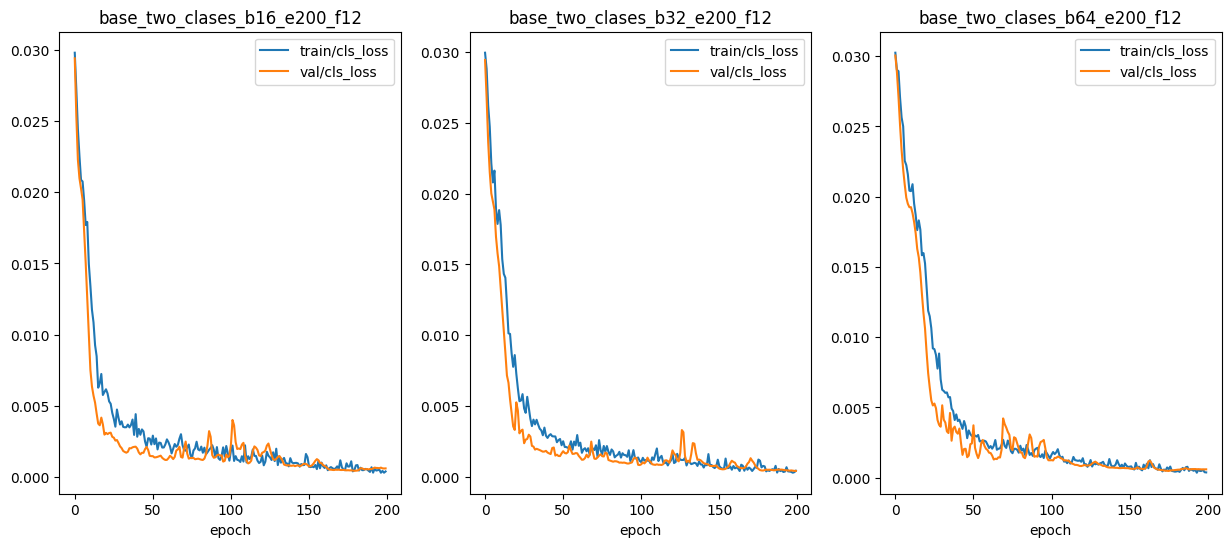

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e200_f12')
axes[1].set_title('base_two_clases_b32_e200_f12')
axes[2].set_title('base_two_clases_b64_e200_f12')

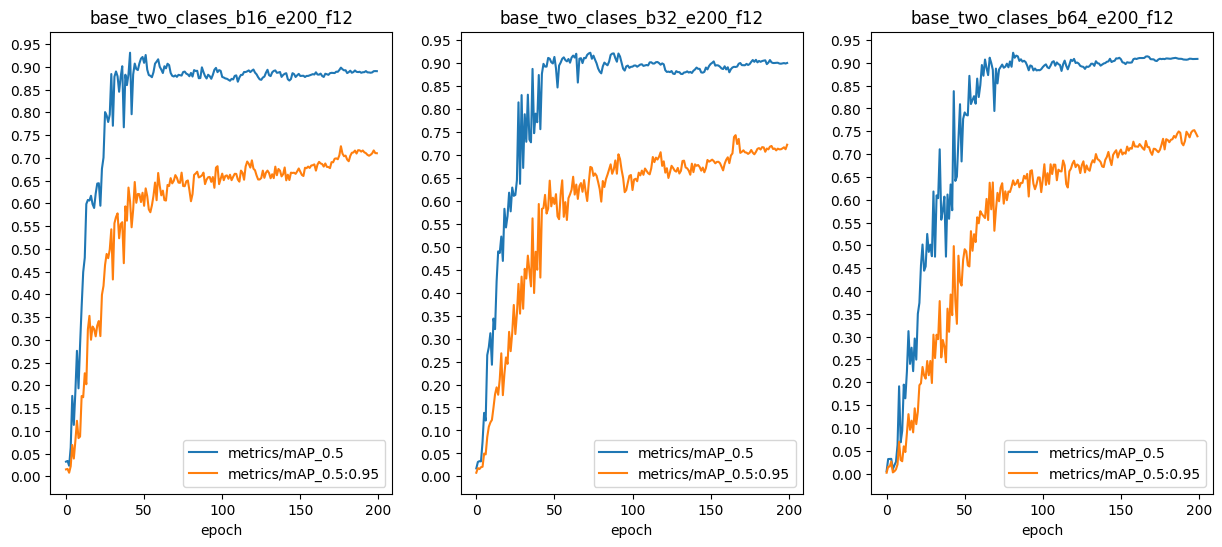

In [11]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e200_f12')
axes[1].set_title('base_two_clases_b32_e200_f12')
axes[2].set_title('base_two_clases_b64_e200_f12')

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[2].yaxis.set_major_locator(ticker.MultipleLocator(0.05))


In [13]:
print(results_b16['metrics/mAP_0.5'].max())
print(results_b16['metrics/mAP_0.5:0.95'].max())

print(results_b32['metrics/mAP_0.5'].max())
print(results_b32['metrics/mAP_0.5:0.95'].max())

print(results_b64['metrics/mAP_0.5'].max())
print(results_b64['metrics/mAP_0.5:0.95'].max())

0.93089
0.72546
0.92256
0.74302
0.92205
0.75242


#### Okay, the best model is with batch 32

## Medium model 

In [35]:
# Set batch size 

batch_s = [16,32,64]

for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12_v5m6'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}

**************TRAINING MODEL b16_e200_f12_v5m6*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b16_e200_f12_v5m6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), 16.49 KiB | 1.27 MiB/s, don

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 298.31
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 112.75it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b16_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b16_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      1.44G     0.1135    0.02603    0.02819         32        640: 1
                 Class     

     46/199      2.78G    0.03725     0.0102   0.002885         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.731      0.821      0.785      0.428

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      2.78G     0.0336     0.0087   0.003449         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.636      0.813      0.683      0.341

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      2.78G    0.03962   0.008659    0.00338         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.773      0.841      0.778      0.423

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      2.78G    0.02935   0.008207   0.001919         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.798      0.882      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      2.78G    0.03112   0.008306   0.002351         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.795      0.888      0.544

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      2.78G    0.03156   0.008987   0.002568         54        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.874      0.835      0.879      0.548

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      2.78G    0.02515   0.006496   0.001301         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.861      0.891      0.633

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      2.78G    0.02344   0.006918   0.001449         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.941      0.847      0.891       0.64

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      2.78G    0.02443   0.007206   0.001634         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.957      0.854      0.898      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      2.78G    0.02072   0.006503   0.001446         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.988      0.832      0.901      0.654

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      2.78G    0.02239   0.006187   0.001308         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.832      0.894      0.607

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      2.78G    0.02129   0.007625    0.00121         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986       0.83      0.888      0.646

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      2.78G    0.01831   0.007352   0.001122         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.849      0.889      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      2.78G    0.01801   0.006906  0.0009593         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.952       0.85       0.89      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      2.78G    0.01709   0.006766  0.0009095         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.844      0.891      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      2.78G    0.01398   0.005566  0.0005951         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.964      0.837      0.899      0.705

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      2.78G    0.01431   0.006043  0.0005686         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.978      0.826      0.895       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      2.78G     0.0138   0.005757  0.0006704         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.838      0.895      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      2.78G     0.0116   0.006417  0.0005826         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.816      0.894      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      2.78G    0.01266   0.005599  0.0005441         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.825      0.894      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      2.78G    0.01191   0.005794  0.0005388         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.98      0.826      0.893      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 289.02
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 62.61it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b32_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b32_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1192    0.02511     0.0291         97        640: 1
                 Class     

     46/199      4.15G     0.0418    0.01023   0.003868         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.656      0.704      0.738      0.346

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.04114    0.01028    0.00349         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.618      0.744       0.71      0.422

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G    0.04083    0.01006   0.003301         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.741      0.804      0.811       0.47

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G    0.03291   0.008427   0.001911         67        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.989      0.842      0.906      0.575

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.03003   0.008705   0.002306        142        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.959      0.842      0.904      0.581

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.03135   0.009236   0.002157         56        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.796      0.844      0.808      0.559

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.02752   0.007001   0.001661        139        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.909      0.876        0.9      0.612

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.02836   0.007682   0.001628         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.912      0.886      0.903      0.614

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.02515   0.006844    0.00187         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.921      0.882        0.9      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.02277   0.006693   0.001336        103        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.859      0.907      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G    0.02282    0.00663    0.00164         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.992      0.823      0.909      0.628

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.02126   0.006211   0.001719         71        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.822      0.909      0.624

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.01759      0.007   0.001094        118        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.893       0.91       0.68

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G    0.01761   0.006491  0.0008863        110        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.93      0.897      0.911      0.679

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.01686   0.005825  0.0008244         63        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.886      0.905      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.01397   0.006167  0.0006606         98        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.938      0.866      0.909      0.688

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.01488    0.00579  0.0007606         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936      0.865      0.911      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.01442   0.006671  0.0005791         97        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.869      0.912      0.704

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.01399   0.005539  0.0005943         79        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.909      0.893       0.91      0.715

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.01148   0.005645  0.0004581         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.914      0.893       0.91      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.01127   0.006062  0.0004566        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.891       0.91      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 292.24
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 111.51it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b64_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b64_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      4.14G     0.1186    0.02457    0.02907        224        640: 1
                 Class     

     46/199      5.68G    0.05887     0.0124   0.005271        197        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.567      0.725      0.576      0.247

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      5.68G    0.05037    0.01304   0.005795        185        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.436      0.717       0.46      0.222

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      5.68G    0.04898    0.01289    0.00612        251        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.486      0.744      0.535      0.219

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      5.68G     0.0354   0.009183   0.002239        175        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.722      0.763      0.737      0.465

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      5.68G    0.03581    0.01163    0.00275        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.797      0.787      0.836      0.515

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      5.68G    0.03525   0.008612   0.002602        157        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.866      0.805      0.851      0.528

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      5.68G    0.02951   0.008386   0.002297        290        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.96      0.872      0.899      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      5.68G     0.0273    0.00827   0.002233        299        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.94      0.859      0.896      0.519

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      5.68G    0.02817   0.008896   0.002339        263        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.973      0.844      0.894      0.617

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      5.68G    0.02248   0.006846   0.001449        256        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.831      0.897      0.671

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      5.68G    0.02391   0.006609   0.001508        235        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.977      0.832      0.898      0.681

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      5.68G    0.02274   0.008733   0.001663        306        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.912       0.88      0.899      0.655

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      5.68G    0.01882   0.006368   0.001121        178        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.858      0.893       0.67

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      5.68G    0.02002   0.006498   0.001548        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.819      0.894      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      5.68G    0.01956   0.007078  0.0009958        289        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.819      0.894      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      5.68G    0.01533   0.005958  0.0007291        201        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.985      0.834      0.898      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      5.68G    0.01609    0.00679  0.0008153        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.825      0.895      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      5.68G    0.01438   0.005904   0.000828        218        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.825      0.893      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      5.68G    0.01202    0.00547  0.0006405        192        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961       0.84      0.896      0.709

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      5.68G    0.01307    0.00586  0.0005267        278        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.839      0.895      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      5.68G     0.0125   0.006759  0.0005881        204        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.822      0.895      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

In [36]:
# Read results
results_b16_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b16_e200_f12_v5m6/results.csv'))
results_b32_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b32_e200_f12_v5m6/results.csv'))
results_b64_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b64_e200_f12_v5m6/results.csv'))

Text(0.5, 1.0, 'b64_e150_f12_v5m6')

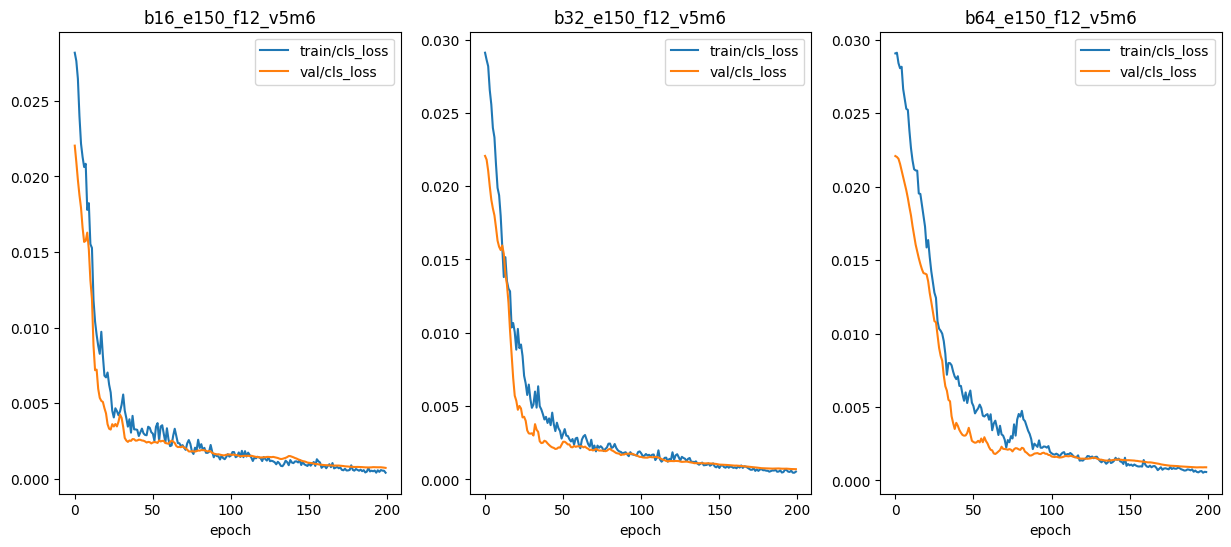

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e150_f12_v5m6')
axes[1].set_title('b32_e150_f12_v5m6')
axes[2].set_title('b64_e150_f12_v5m6')

In [39]:
print(results_b16_v5m6['metrics/mAP_0.5'].max())
print(results_b16_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b32_v5m6['metrics/mAP_0.5'].max())
print(results_b32_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b64_v5m6['metrics/mAP_0.5'].max())
print(results_b64_v5m6['metrics/mAP_0.5:0.95'].max())

0.90671
0.71014
0.91678
0.71956
0.90582
0.71818


### The model selected so far is <span style="color:red">b32_e150_f12_v5m6</span>. 